<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


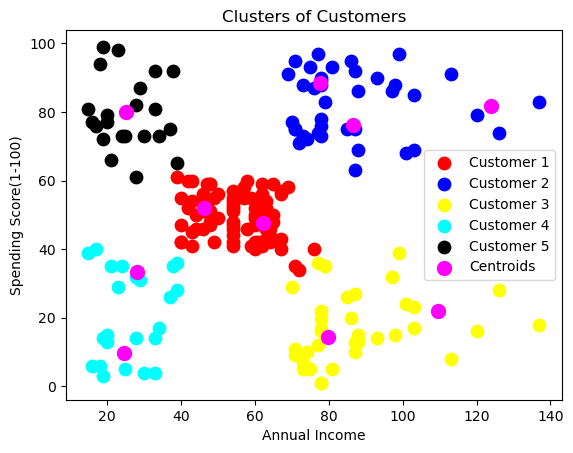

In [2]:
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = "1"

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
df= pd.read_csv("Mall_Customers.csv")
df.shape
df.info()
x=df.iloc[:,[3,4]].values
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeansmodel.fit_predict(x)
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans ==0,1], s=80, c="red", label='Customer 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans ==1,1], s=80, c="blue", label='Customer 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans ==2,1], s=80, c="yellow", label='Customer 3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans ==3,1], s=80, c="cyan", label='Customer 4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans ==4,1], s=80, c="black", label='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()